## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Handling pre-processed data

In [2]:
df = pd.read_csv('../preprocess_data.csv')
df.drop(['task_2','Unnamed: 0','text'], axis=1, inplace=True)
df.head()

,Unnamed: 0.1,_id,task_1,text_clean
0,0,60c5d6bf5659ea5e55defa2c,HOF,made amp amp onli abl start make money sustain...
1,1,60c5d6bf5659ea5e55def461,HOF,technic still turn back clock dick head
2,2,60c5d6bf5659ea5e55defaad,NOT,govt stop think world media liber gang ani opt...
3,3,60c5d6bf5659ea5e55def419,HOF,soldier japan dick head
4,4,60c5d6bf5659ea5e55def7fa,HOF,would better ask think sleazi shitbag lmao


Text(0, 0.5, 'Frequency')

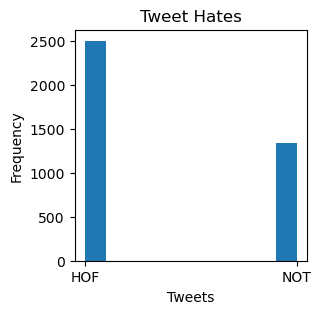

In [3]:
fig, ax = plt.subplots(figsize=(3,3))

ax.hist(df['task_1'])

ax.set_title('Tweet Hates')
ax.set_xlabel('Tweets')
ax.set_ylabel('Frequency')

In [4]:
print(df.isnull().values.any())

True


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5)
X = tfidfconverter.fit_transform(df['text_clean'].values.astype('U')).toarray()
y = df['task_1']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

## Using various ML techniques to find the accuracy

In [7]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[153 227]
 [ 43 154]]
              precision    recall  f1-score   support

         HOF       0.78      0.40      0.53       380
         NOT       0.40      0.78      0.53       197

    accuracy                           0.53       577
   macro avg       0.59      0.59      0.53       577
weighted avg       0.65      0.53      0.53       577



In [8]:
nb1=classifier

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[358  22]
 [ 96 101]]
              precision    recall  f1-score   support

         HOF       0.79      0.94      0.86       380
         NOT       0.82      0.51      0.63       197

    accuracy                           0.80       577
   macro avg       0.80      0.73      0.74       577
weighted avg       0.80      0.80      0.78       577



In [10]:
lr1=classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 18, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[335  45]
 [102  95]]
              precision    recall  f1-score   support

         HOF       0.77      0.88      0.82       380
         NOT       0.68      0.48      0.56       197

    accuracy                           0.75       577
   macro avg       0.72      0.68      0.69       577
weighted avg       0.74      0.75      0.73       577



In [12]:
kn1=classifier

In [13]:
from sklearn.model_selection import RepeatedKFold

In [14]:
from sklearn.svm import LinearSVC
sv = LinearSVC()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      sv.fit(x_train,y_train)
      predictions = sv.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

      

0.7792207792207793


C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

0.8046875


C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

In [15]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         HOF       0.79      0.86      0.83       245
         NOT       0.71      0.60      0.65       139

    accuracy                           0.77       384
   macro avg       0.75      0.73      0.74       384
weighted avg       0.76      0.77      0.76       384



In [16]:
svm1=sv

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      rf.fit(x_train,y_train)
      predictions = rf.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

0.7428571428571429
0.7480519480519481
0.7766233766233767
0.7786458333333334
0.7890625
0.8098958333333334
0.8333333333333334


In [18]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         HOF       0.83      0.87      0.85       254
         NOT       0.72      0.64      0.68       130

    accuracy                           0.79       384
   macro avg       0.77      0.76      0.76       384
weighted avg       0.79      0.79      0.79       384



In [19]:
rf1=rf

In [20]:
import pickle

# 假设 kn1, lr1, nb1, rf1, svm1 是你训练好的模型对象

# 保存模型
pickle.dump(kn1, open('best_KN_model1.sav', 'wb'))
pickle.dump(lr1, open('best_LR_model1.sav', 'wb'))
pickle.dump(nb1, open('best_NB_model1.sav', 'wb'))
pickle.dump(rf1, open('best_RF_model1.sav', 'wb'))
pickle.dump(svm1, open('best_SVM_model1.sav', 'wb'))
